In [1]:
#load augmented data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/augmented-train.p'
validation_file= 'traffic-signs-data/augmented-valid.p'
testing_file = 'traffic-signs-data/augmented-test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
gray_img_train, lab_train = train['features'], train['labels']
gray_img_valid, lab_valid = valid['features'], valid['labels']
gray_img_test, lab_test = test['features'], test['labels']

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
img_train, lab_train = train['features'], train['labels']
img_valid, lab_valid = valid['features'], valid['labels']
img_test, lab_test = test['features'], test['labels']

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import pandas as pd

# TODO: Number of training examples
n_train = np.size(lab_train)

# TODO: Number of validation examples
n_validation = np.size(lab_valid)

# TODO: Number of testing examples.
n_test = np.size(lab_test)

# TODO: What's the shape of an traffic sign image?
image_shape = img_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.size(np.unique(lab_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation) #added
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


In [4]:
import csv

labels = None
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    next(reader, None)
    labels = {int(rows[0]):rows[1] for rows in reader}

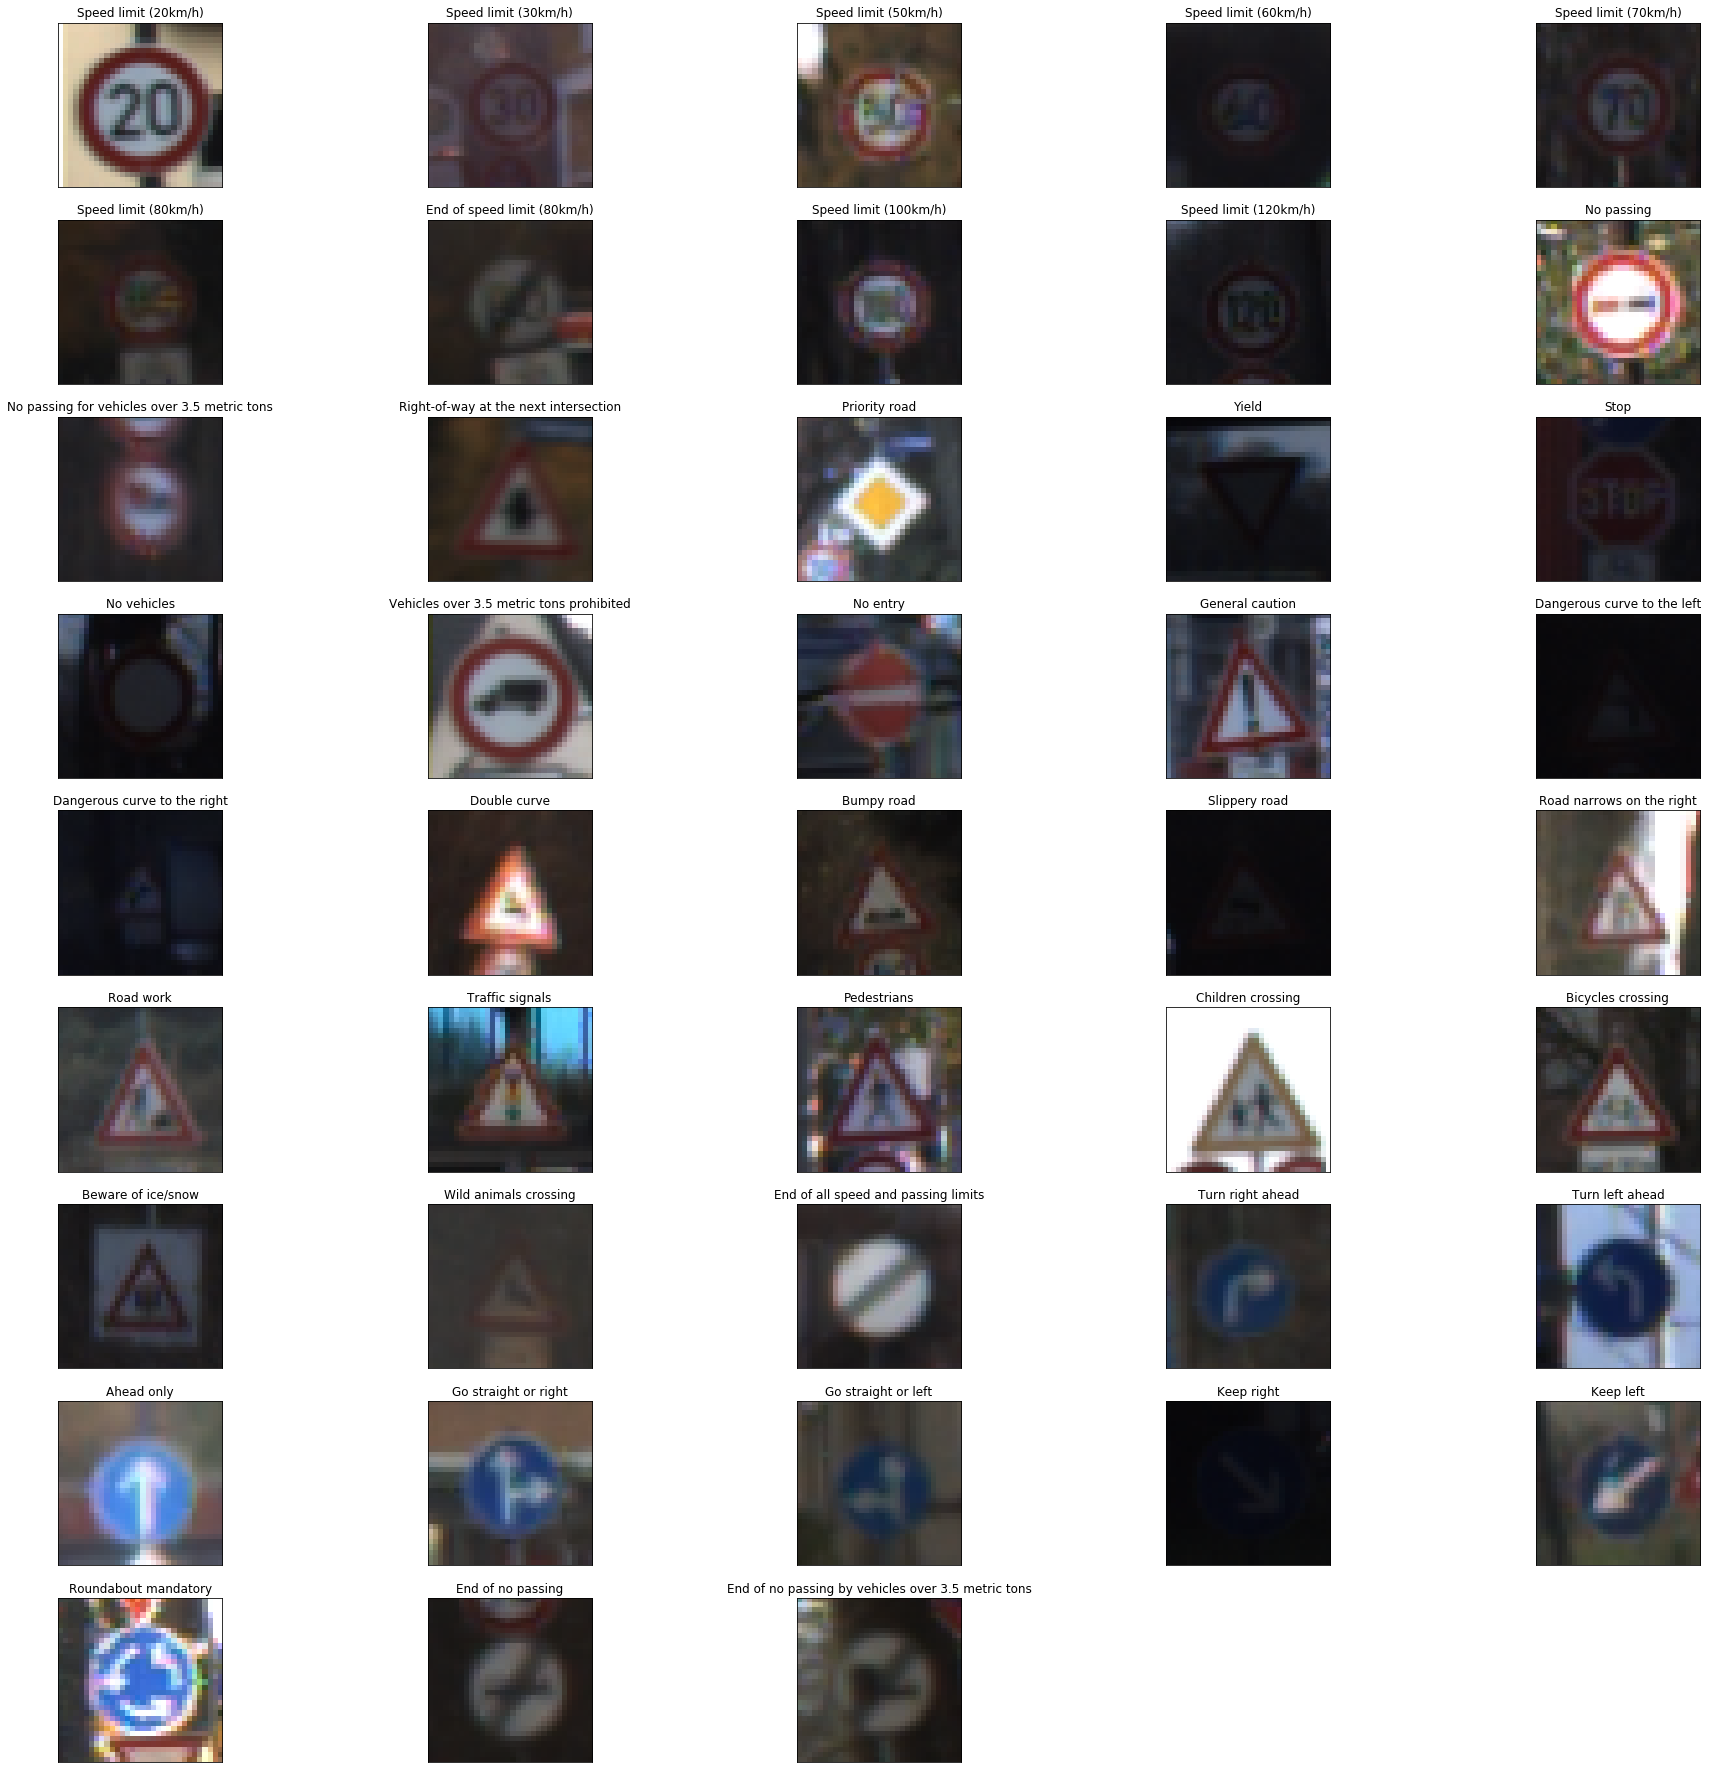

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

### Visualizing Data for Each Label
fig = plt.figure(figsize=(32,32))
for i in range(n_classes):
    k = np.where(lab_train==i)
    img = img_train[k[0][0]]
    ax = fig.add_subplot(int(n_classes/5)+1,5,i+1)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(img, interpolation='none')
    ax.set_title(labels[lab_train[k[0][0]]])
plt.show()

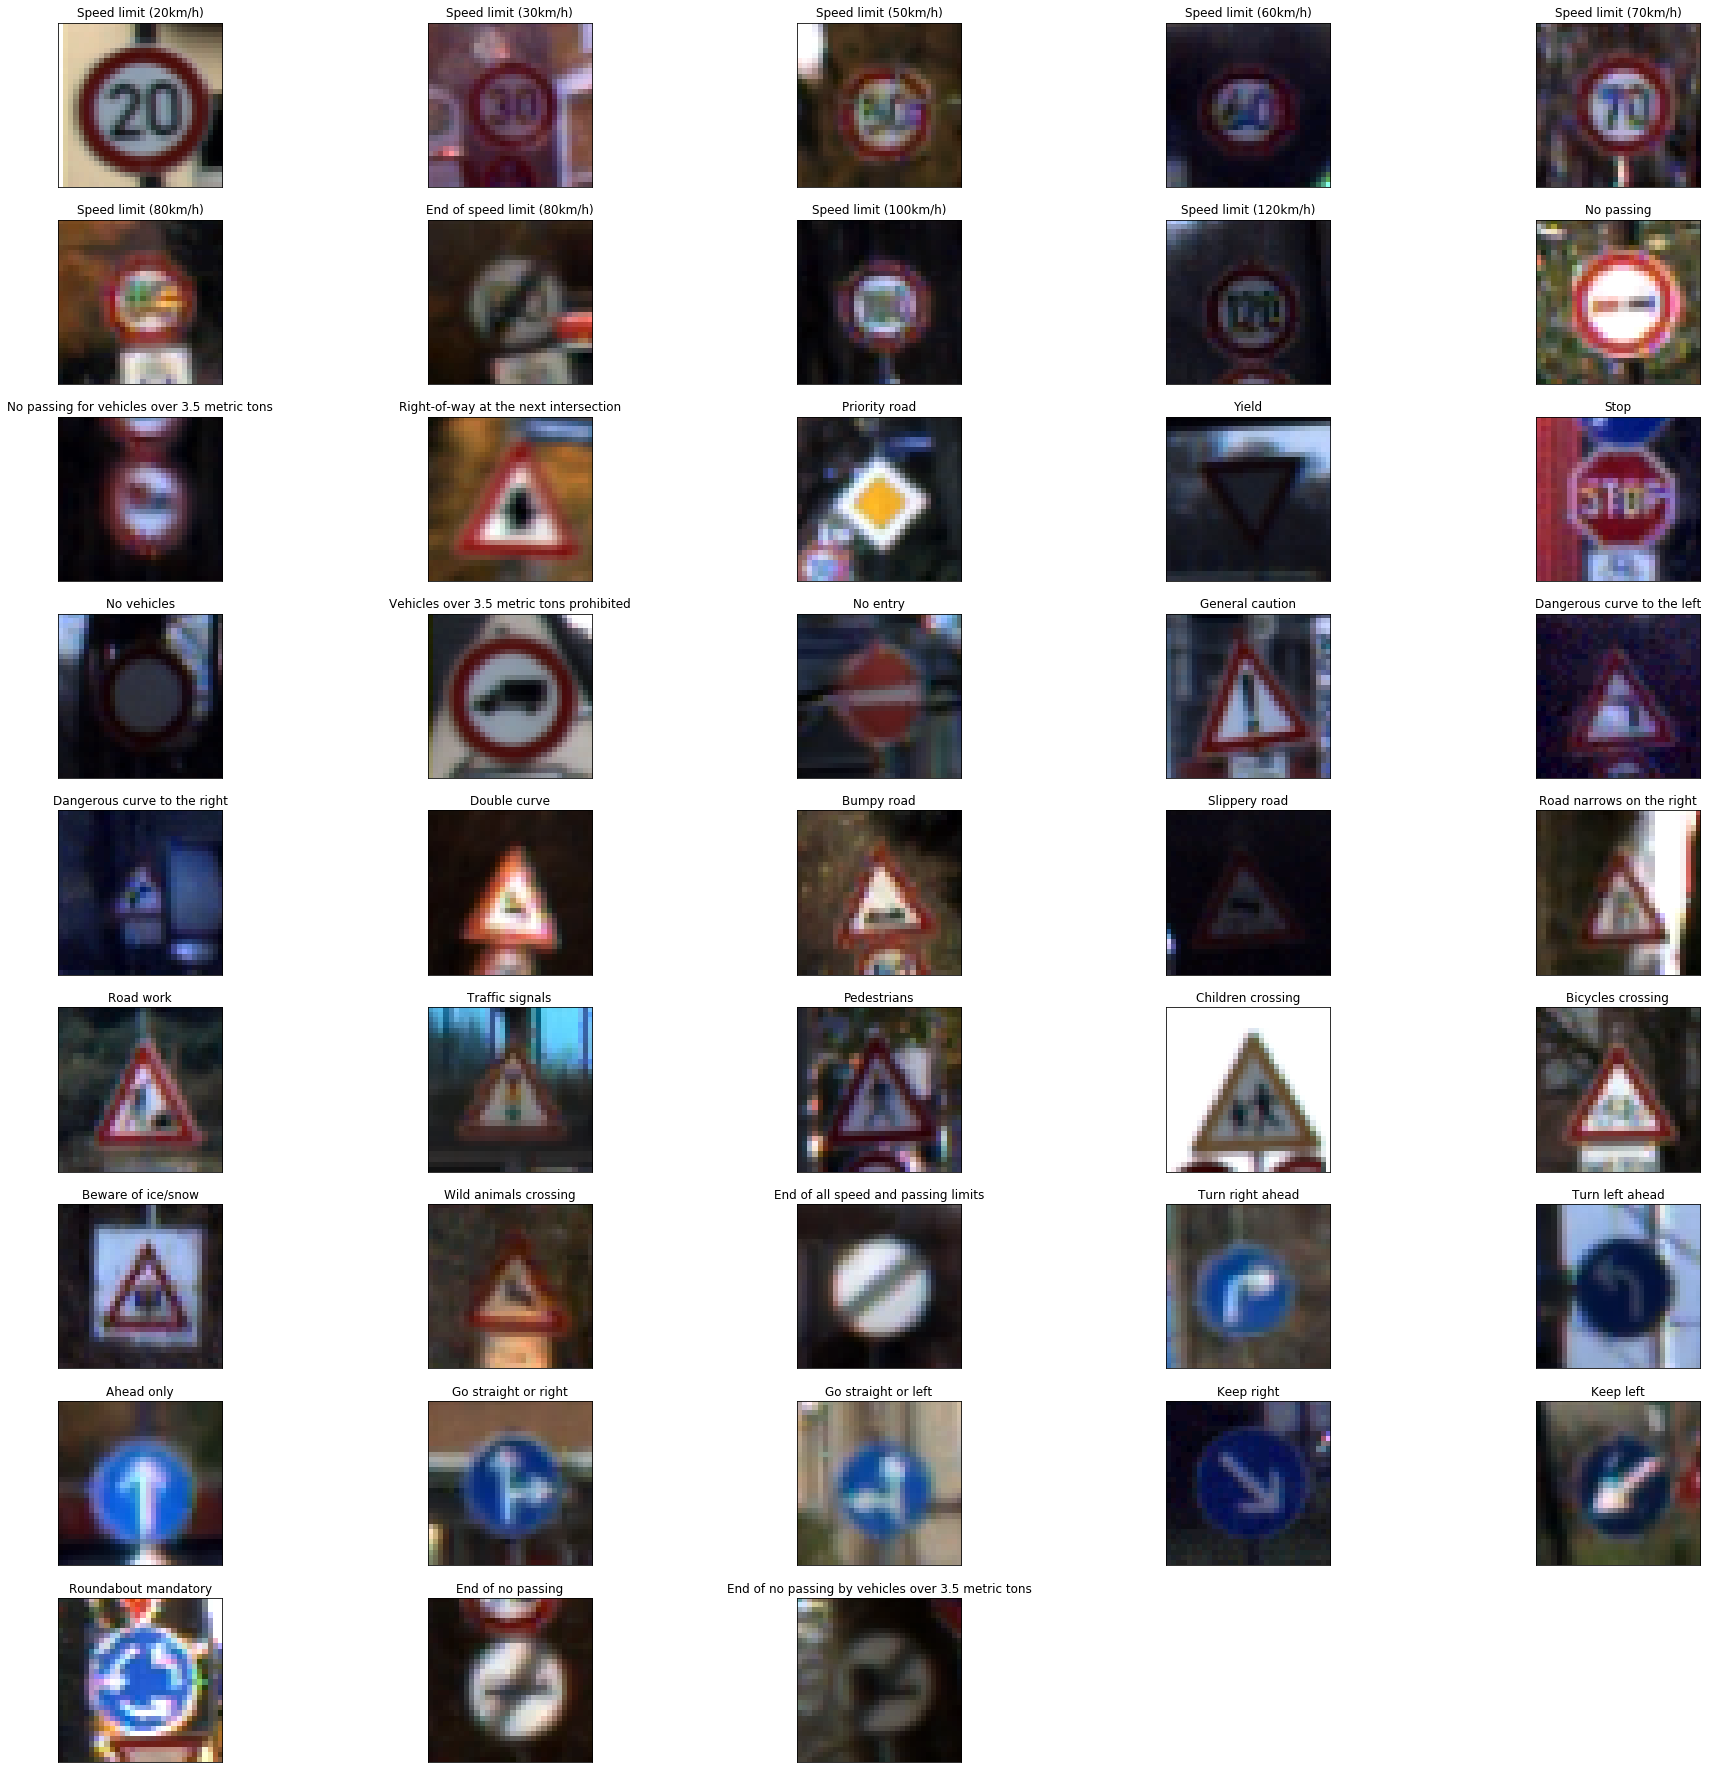

In [7]:
from skimage import data, img_as_float
from skimage import exposure
import cv2

fig = plt.figure(figsize=(32,32))
for i in range(n_classes):
    k = np.where(lab_train==i)
    img = img_train[k[0][0]]
    temp_img = np.zeros((1, 32,32,3), dtype=np.float32)
    output_img = cv2.normalize(img, temp_img, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F).reshape(32,32,3)

    ax = fig.add_subplot(int(n_classes/5)+1,5,i+1)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(output_img, interpolation='none')
    ax.set_title(labels[lab_train[k[0][0]]])
plt.show()


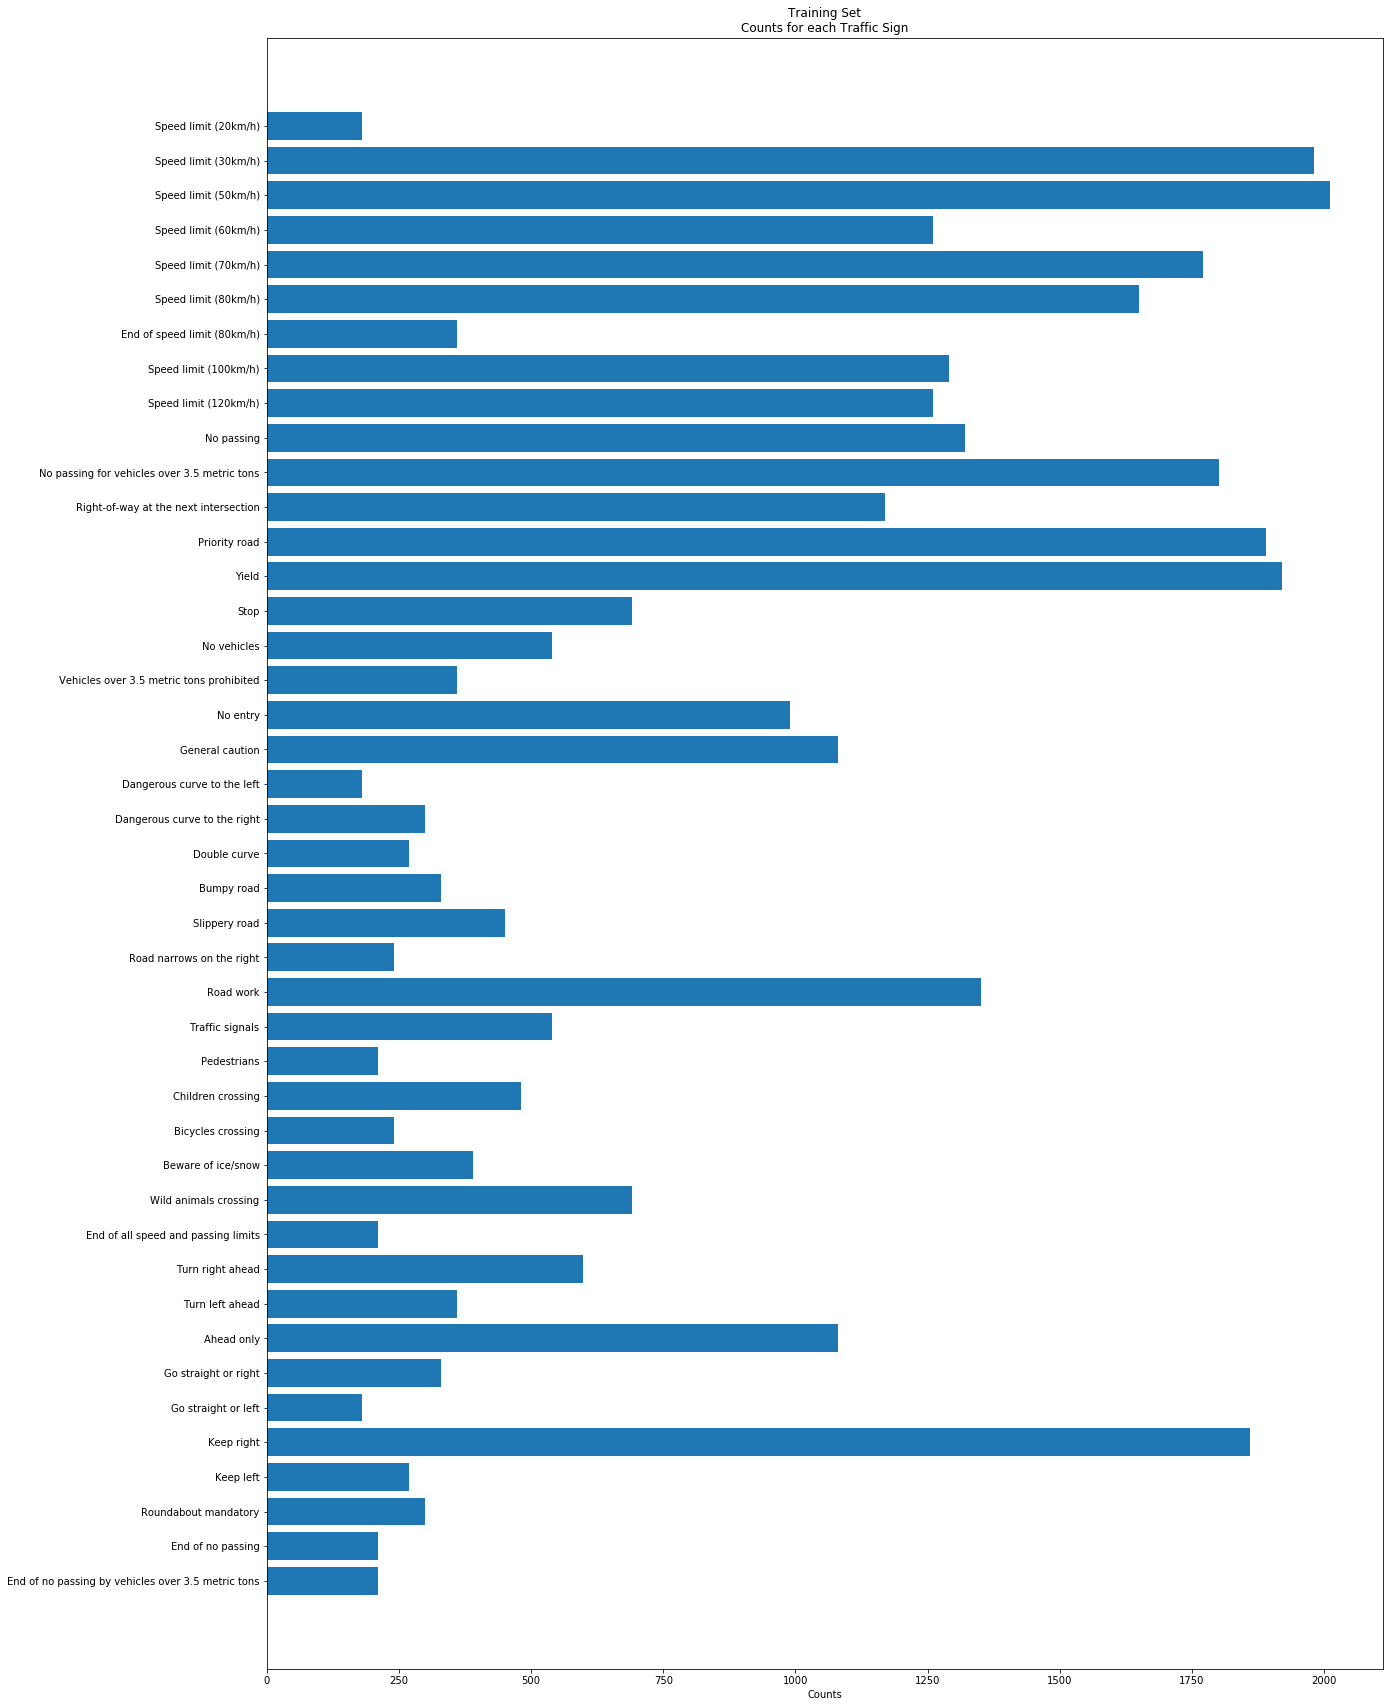

In [8]:
### Count of each class in train and validation set
ind = np.arange(n_classes)

hist_train, bins = np.histogram( lab_train, n_classes)

fig, ax = plt.subplots()
#set_train = ax.hist(lab_train, ind)
set_train = ax.barh(ind, hist_train)

# add some text for labels, title and axes ticks
ax.set_xlabel('Counts')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(ind)
ax.set_yticklabels(labels.values())
ax.set_title('Training Set\nCounts for each Traffic Sign')

fig.set_figheight(30)
fig.set_figwidth(20)

plt.show()


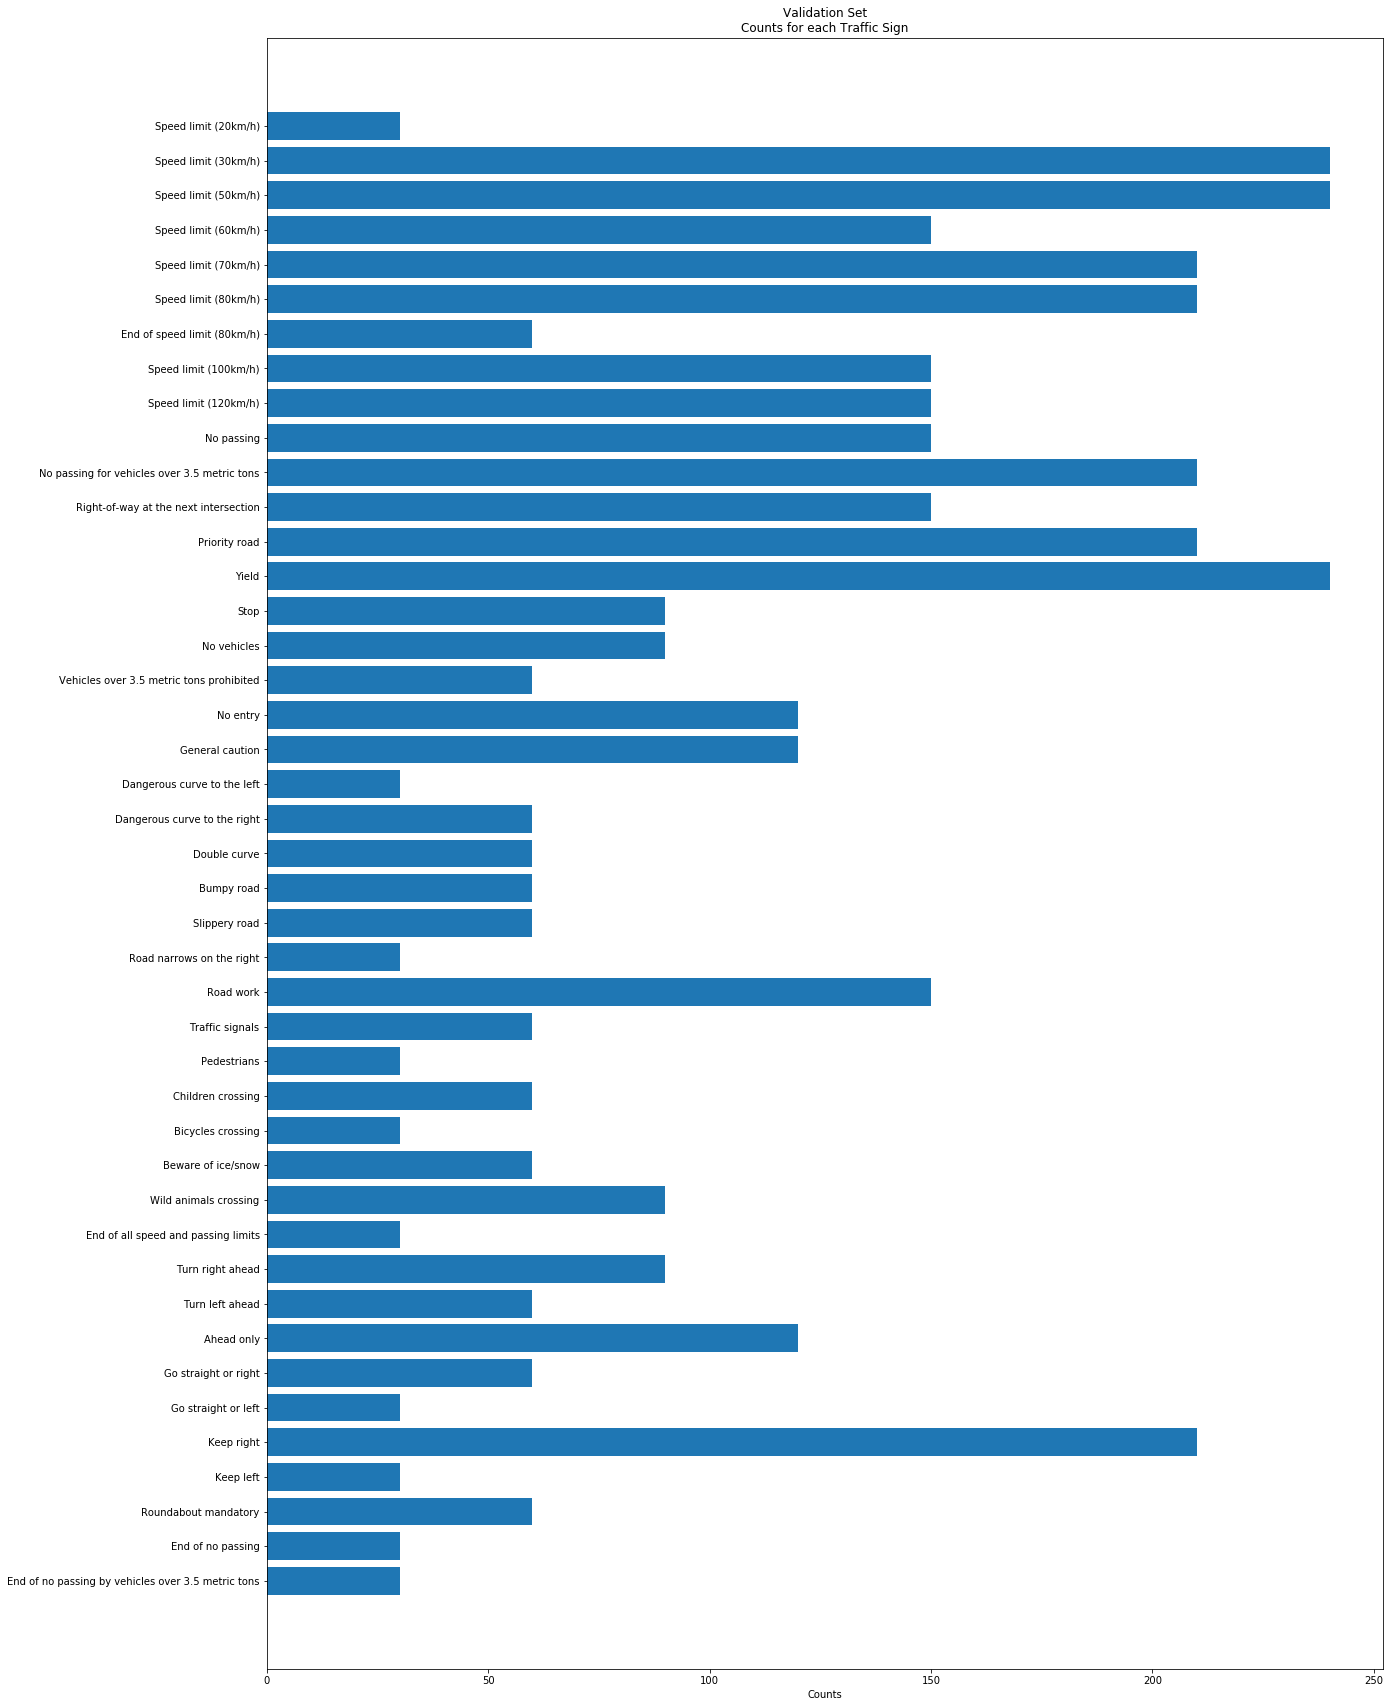

In [9]:
### Count of each class in train and validation set
ind = np.arange(n_classes)

hist_valid, bins = np.histogram( lab_valid, n_classes)

fig, ax = plt.subplots()
#set_train = ax.hist(lab_train, ind)
set_train = ax.barh(ind, hist_valid)

# add some text for labels, title and axes ticks
ax.set_xlabel('Counts')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(ind)
ax.set_yticklabels(labels.values())
ax.set_title('Validation Set\nCounts for each Traffic Sign')

fig.set_figheight(30)
fig.set_figwidth(20)

plt.show()
